# Working with data

**Input data: Gait metrics of healthy controls, PD and FGD patients**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk

from bokeh.io import curdoc
from bokeh.models.widgets import PreText, Select
from bokeh.layouts import column, widgetbox
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import figure, output_file, show

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Output, Layout, Box, Dropdown
import ipywidgets as widgets

In [2]:
input_data_file = 'HW3_input_data.xlsx'
sheet = 'Gait_data'
#input_data_file = input('Full Path to data file: ')
#sheet = input('Sheet name to be imported: ')
data = pd.read_excel(input_data_file,sheet_name=sheet,header=0)
data.shape

(147, 47)

** Experiment with widgets **

In [15]:
data = data.dropna()
data_headers = data.columns

item_layout = widgets.Layout(
    width='100%',
    display='flex-grow',
    flex_flow='row',
    justify_content='space-between')

w2 = widgets.Box([widgets.Dropdown(options=data_headers,
    #value='2',
    description='Header:',
    disabled=False,
    width='100%')], 
    layout=item_layout )

'''w1 = widgets.SelectMultiple(    
    options=data_headers,
    description='Headers',
    disabled=False,
    )'''
ui = widgets.VBox([w2])
ui


A Jupyter Widget

In [17]:
# output to static HTML file
output_file("results.html")

#menu = [("Item 1", "item_1"), ("Item 2", "item_2"), None, ("Item 3", "item_3")]
menu = list(data)
select = Select(title="variables",value="Dx", options=menu)

show(widgetbox(select))

#source = ColumnDataSource(data=dict(x=data.menu[1], y=data.menu[5]))

# create a new plot with a title and axis labels
p = figure(title="Gait Speed", x_axis_label='GaitSpeed', y_axis_label='DoubleSupportTime')
p.circle(data.GaitSpeed, data.DoubleSupportTime , legend="GaitSpeed vs DST", color='olive',alpha=0.5)
show(p)

In [7]:
# Select required columns
Subj_info = data.loc[:,['SubjID','Dx']]
print(Subj_info.shape)
CoI1 = data.filter(regex='min') # Select all columns which have 'min' in the header string
std = [col for col in data.columns if 'std' in col] # std colums are not needed
CoI1 = CoI1[CoI1.columns.drop(std)] # drop std related columns
print(CoI1.shape)
CoI2 = data.iloc[:,-9:] # select by location
print(CoI2.shape)

(135, 2)
(135, 12)
(135, 9)


In [8]:
# concatenate 3 data frames
CoI = pd.concat([Subj_info, CoI1, CoI2], axis=1, join_axes=[Subj_info.index])
CoI = CoI.dropna() # drop missing data rows
print(CoI.columns)

# create meaningful category name for diagnosis
CoI["Dx_name"] = CoI["Dx"].astype("category")
CoI["Dx_name"].cat.categories = ["Controls","FGD","PD"]
print("Dx_name: ", CoI['Dx_name'].cat.categories)

Index(['SubjID', 'Dx', 'GaitSpeed_LRmean_2minWalk',
       'StrideLength_LRmean_2minWalk', 'DoubleSupportTime_LRmean_2minWalk',
       'FootStrikeAngle_LRmean_2minWalk', 'Turn_Velocity_mean_2minWalk',
       'Steps_in_Turn_mean_2minWalk', 'GaitSpeed_LRmean_1minDT',
       'StrideLength_LRmean_1minDT', 'DoubleSupportTime_LRmean_1minDT',
       'FootStrikeAngle_LRmean_1minDT', 'Turn_Velocity_mean_1minDT',
       'Steps_in_Turn_mean_1minDT', 'GaitSpeed', 'StrideLength',
       'DoubleSupportTime', 'FootStrikeAngle', 'TurnVelocity', 'StepsInTurn',
       'Seated', 'Longwalk', 'Cog_DTC'],
      dtype='object')
Dx_name:  Index(['Controls', 'FGD', 'PD'], dtype='object')


In [9]:
CoI.groupby('Dx_name').mean() # group by diagnosis category and get mean of each column

,SubjID,Dx,GaitSpeed_LRmean_2minWalk,StrideLength_LRmean_2minWalk,DoubleSupportTime_LRmean_2minWalk,FootStrikeAngle_LRmean_2minWalk,Turn_Velocity_mean_2minWalk,Steps_in_Turn_mean_2minWalk,GaitSpeed_LRmean_1minDT,StrideLength_LRmean_1minDT,...,Steps_in_Turn_mean_1minDT,GaitSpeed,StrideLength,DoubleSupportTime,FootStrikeAngle,TurnVelocity,StepsInTurn,Seated,Longwalk,Cog_DTC
Dx_name,,,,,,,,,,,,,,,,,,,,,
Controls,114.534884,0.0,1.125000,1.202791,21.166279,19.234419,184.970698,3.686279,0.954419,1.120930,...,3.411395,-15.215474,-6.803630,14.633479,-6.142650,-2.698875,-6.933710,34.279070,33.906977,-5.577904
FGD,80.909091,1.0,0.721818,0.778182,28.536818,9.391364,119.103636,5.108182,0.650455,0.735000,...,4.872727,-10.988522,-6.421456,8.236686,-7.556296,-5.527499,-4.555087,21.000000,20.727273,-8.115061
PD,52.209877,2.0,0.937160,0.994444,23.258704,12.000309,137.353580,4.640988,0.780926,0.883519,...,4.813580,-17.125936,-11.475871,13.202985,-24.648692,-8.583912,4.853339,27.987654,29.864198,-2.240684


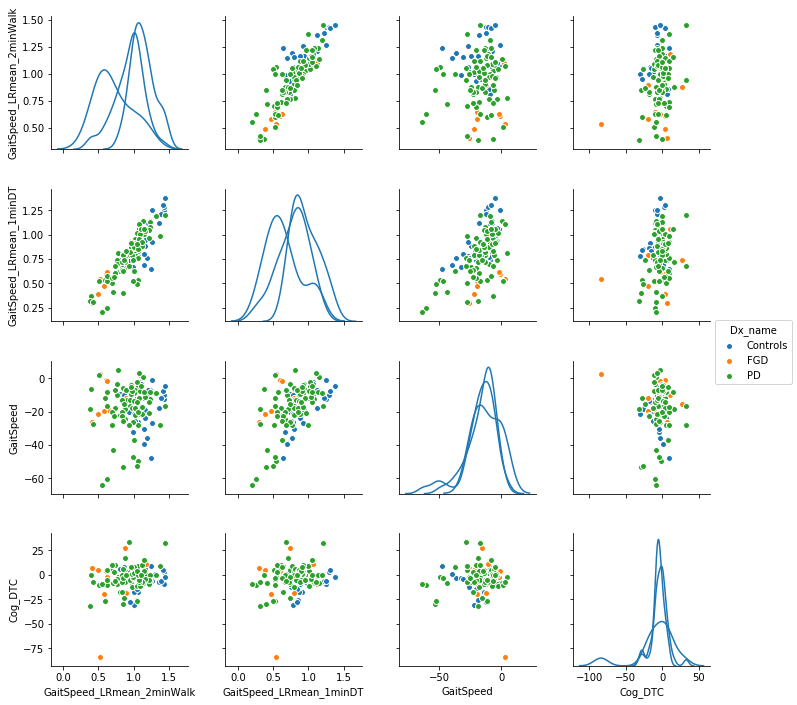

In [10]:
sns.pairplot(CoI, vars=["GaitSpeed_LRmean_2minWalk","GaitSpeed_LRmean_1minDT","GaitSpeed", "Cog_DTC"],hue="Dx_name", diag_kind='kde')

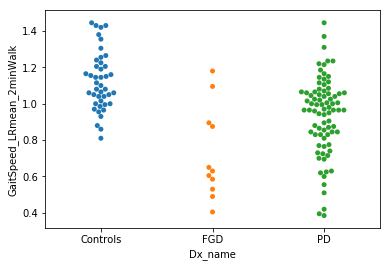

In [14]:
plt.show(sns.swarmplot(x="Dx_name", y="GaitSpeed_LRmean_2minWalk", data=CoI))

**linear model plots**

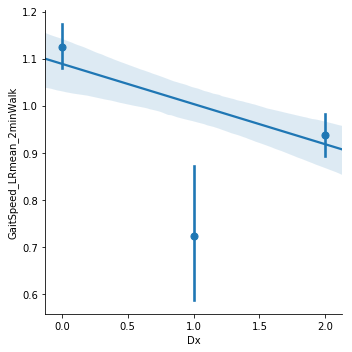

In [12]:
sns.lmplot(x="Dx",y="GaitSpeed_LRmean_2minWalk", data=CoI, x_jitter=0.1, x_estimator=np.mean )

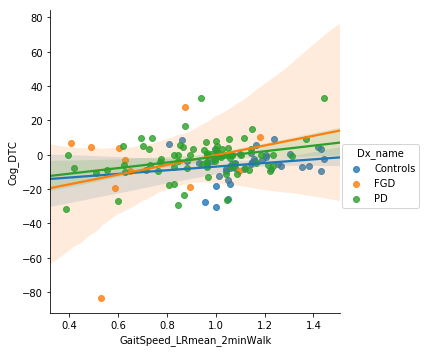

In [13]:
sns.lmplot(x="GaitSpeed_LRmean_2minWalk", y="Cog_DTC", hue="Dx_name", data=CoI )

Graph shows relation between gait speed and cognitive dual task cost. Here, lower cognitive dual task cost is indicative of longer time taken to do two tasks. So, the graph shows a trend where lower gait speed shows lower cognitive dual task cost. The graph shows higher correlation between the two metrics for FGDs.

In [ ]:
def create_graph():
    